 ## How to extract data from IBGE tables in Python  (in brazilian portuguese only)
 BY: Dalciana Waller
 
 
 ### IBGE: Instituto Brasileiro de Geografia e Estatistica
 
 
####  1  - If you want to gather any table from the Brazilian Institute of Geography and Statistics - IBGE - site , I suggest using the PyIBGE module, developed by Renan Birck: https://github.com/renanbirck/pyibge

This module accesses the API from IBGe website: http://api.sidra.ibge.gov.br/

** After you download the module PyIBGE in a local folder, you have to add the folder path into the sys.path of your computer. So Python can identify this module via 'import' command as you work with it.

Option 1) Using command lines in Python:
import sys
sys.path.append(r'yourpath\pyIBGE')
import pyIBGE
Option 2) On start menu, search for "Edit system evironment variables" --> click Environment variables --> click "Path"--> click "Edit" --> New --> then add folder name)

####  For help on how to use the API:

http://api.sidra.ibge.gov.br/home/ajuda


#### 2 - To consult IBGE table names and numbers:
Youl should explore  https://sidra.ibge.gov.br/home/pms/brasil
 In Example 1, I show a step-by-step on how to find the IBGE table names in SIDRA environment.

 
 #### Obs.: Special symbols
 ímbolos especiais  
Existem símbolos que representam valores especiais, como listados abaixo:
  
Símbolo	Significado  
-	Zero absoluto, não resultante de um cálculo ou arredondamento.    
Ex: Em determinado município não existem pessoas de 14 anos de idade sem instrução.  
0	Zero resultante de um cálculo ou arredondamento.  
Ex: A inflação do feijão em determinada Região Metropolitana foi 0.  
Determinado município produziu 400 kg de sementes de girassol e os dados da tabela são expressos em toneladas.  
X	Valor inibido para não identificar o informante.  
Ex: Determinado município só possui uma empresa produtora de cimento, logo o valor de sua produção deve ser inibido.  
..	Valor não se aplica.  
Ex: Não se pode obter o total da produção agrícola em determinado município quando os produtos agrícolas são contabilizados com unidades de medida distintas.    
...	Valor não disponível.     
   
Ex: A produção de feijão em determinado município não foi pesquisada ou determinado município não existia no ano da pesquisa.  
A a Z  
(exceto X)	Significa uma faixa de valores. Varia em função da tabela (se for o caso).  
Ex: O nível de precisão da produção estimada de combustíveis está na faixa A (95 a 100%).  

In [19]:
"""
==========================================================================================
EXAMPLE 1

PNADC
Pesquisa Nacional por Amostra de Domicílios Contínua - Divulgação Mensal - jun-jul-ago 2020

https://sidra.ibge.gov.br/home/pnadcm/brasil

Rendimento - Indicadores selecionados
============================================================================================
"""


'\n==========================================================================================\nEXAMPLE 1\n\nPNADC\nPesquisa Nacional por Amostra de Domicílios Contínua - Divulgação Mensal - jun-jul-ago 2020\n\nhttps://sidra.ibge.gov.br/home/pnadcm/brasil\n\nRendimento - Indicadores selecionados\n============================================================================================\n'

### Step-by-step

#### 1)  Enter sidra site for pnadc : https://sidra.ibge.gov.br/home/pnadcm/brasil

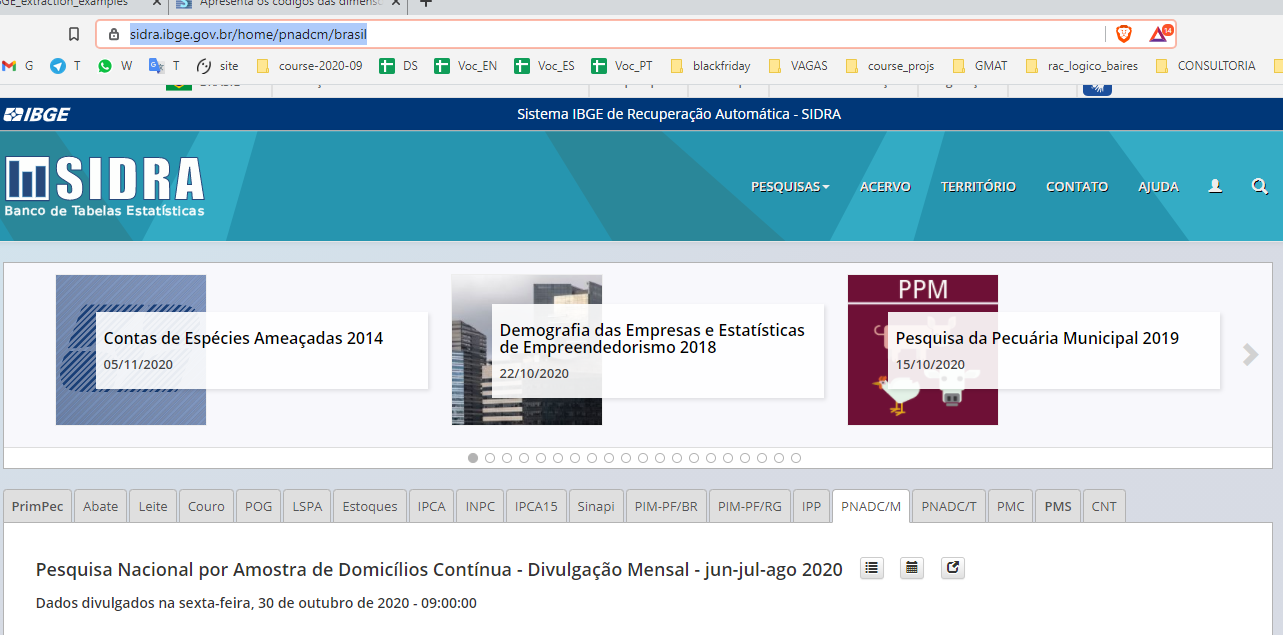

2) Scroll down until you find the frame: "Rendimento - indicadores slecionados"
The frame contain several tables, and to seem them click the button "Listar tabelas"


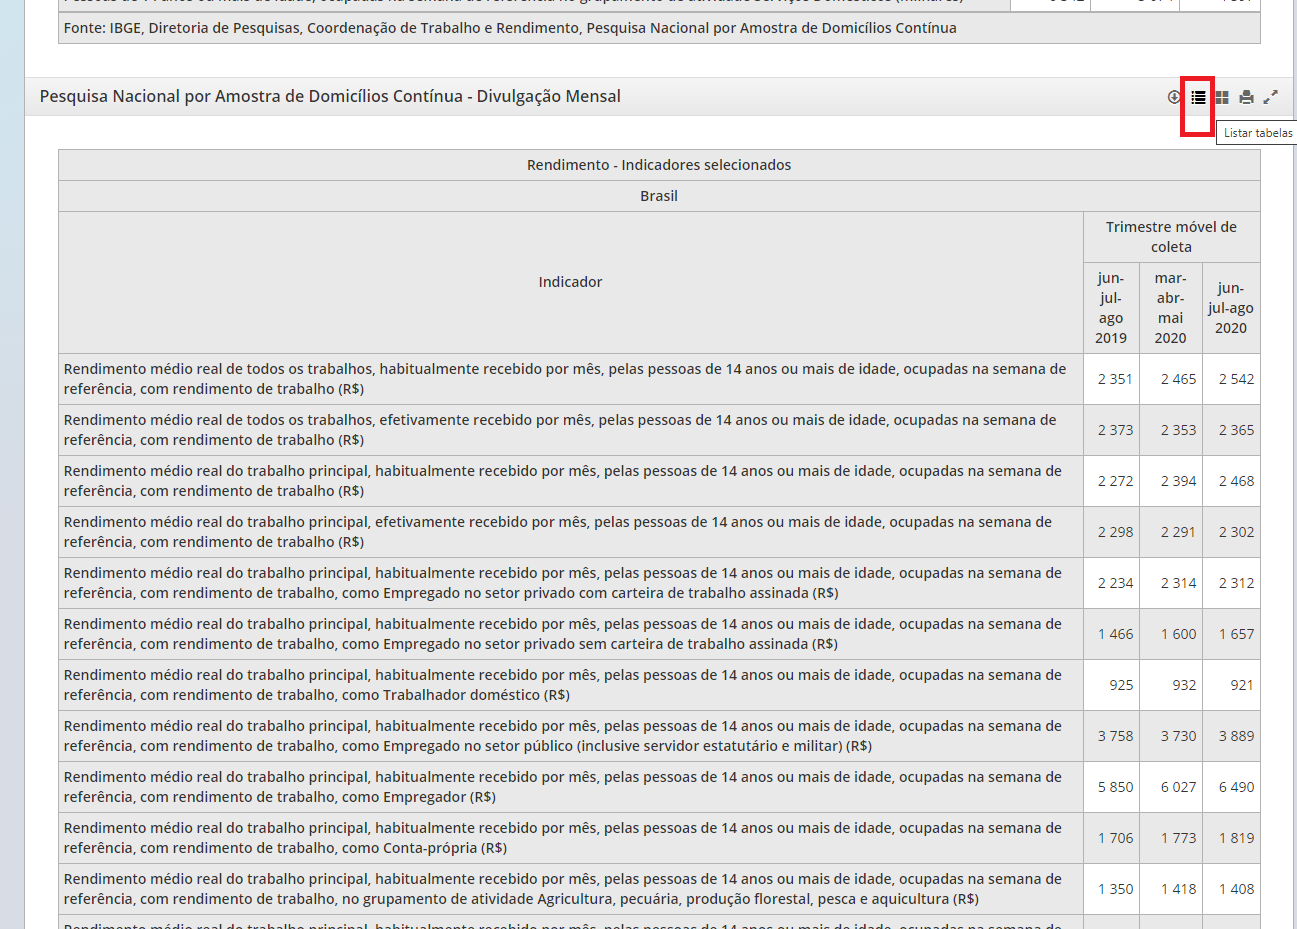


#### The table list will appear:

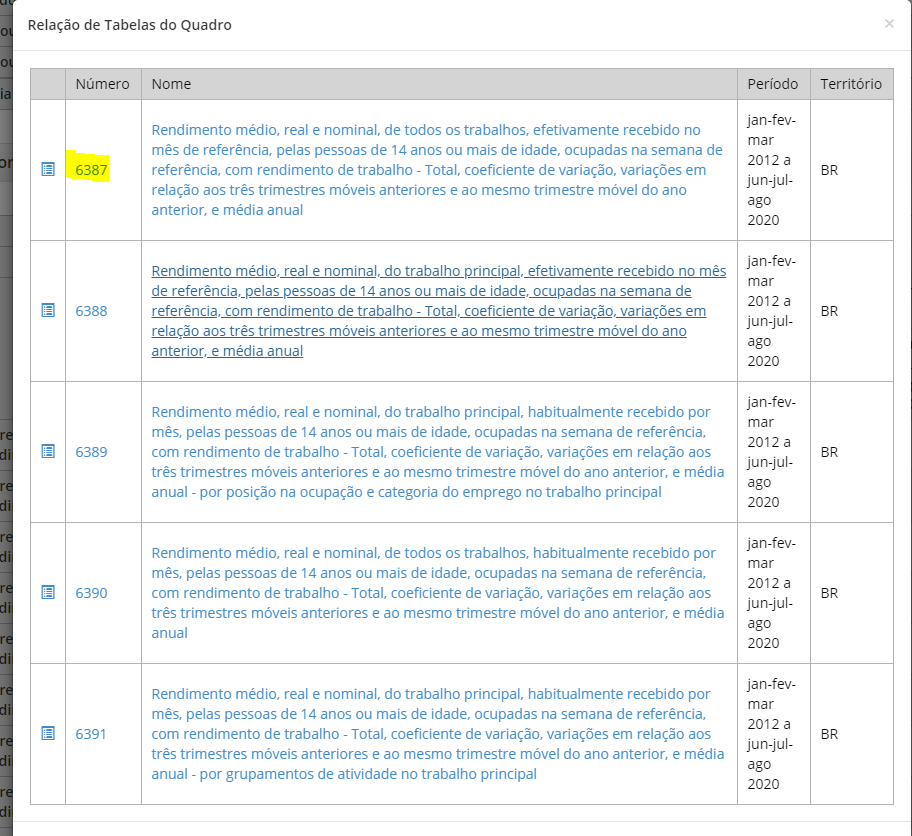

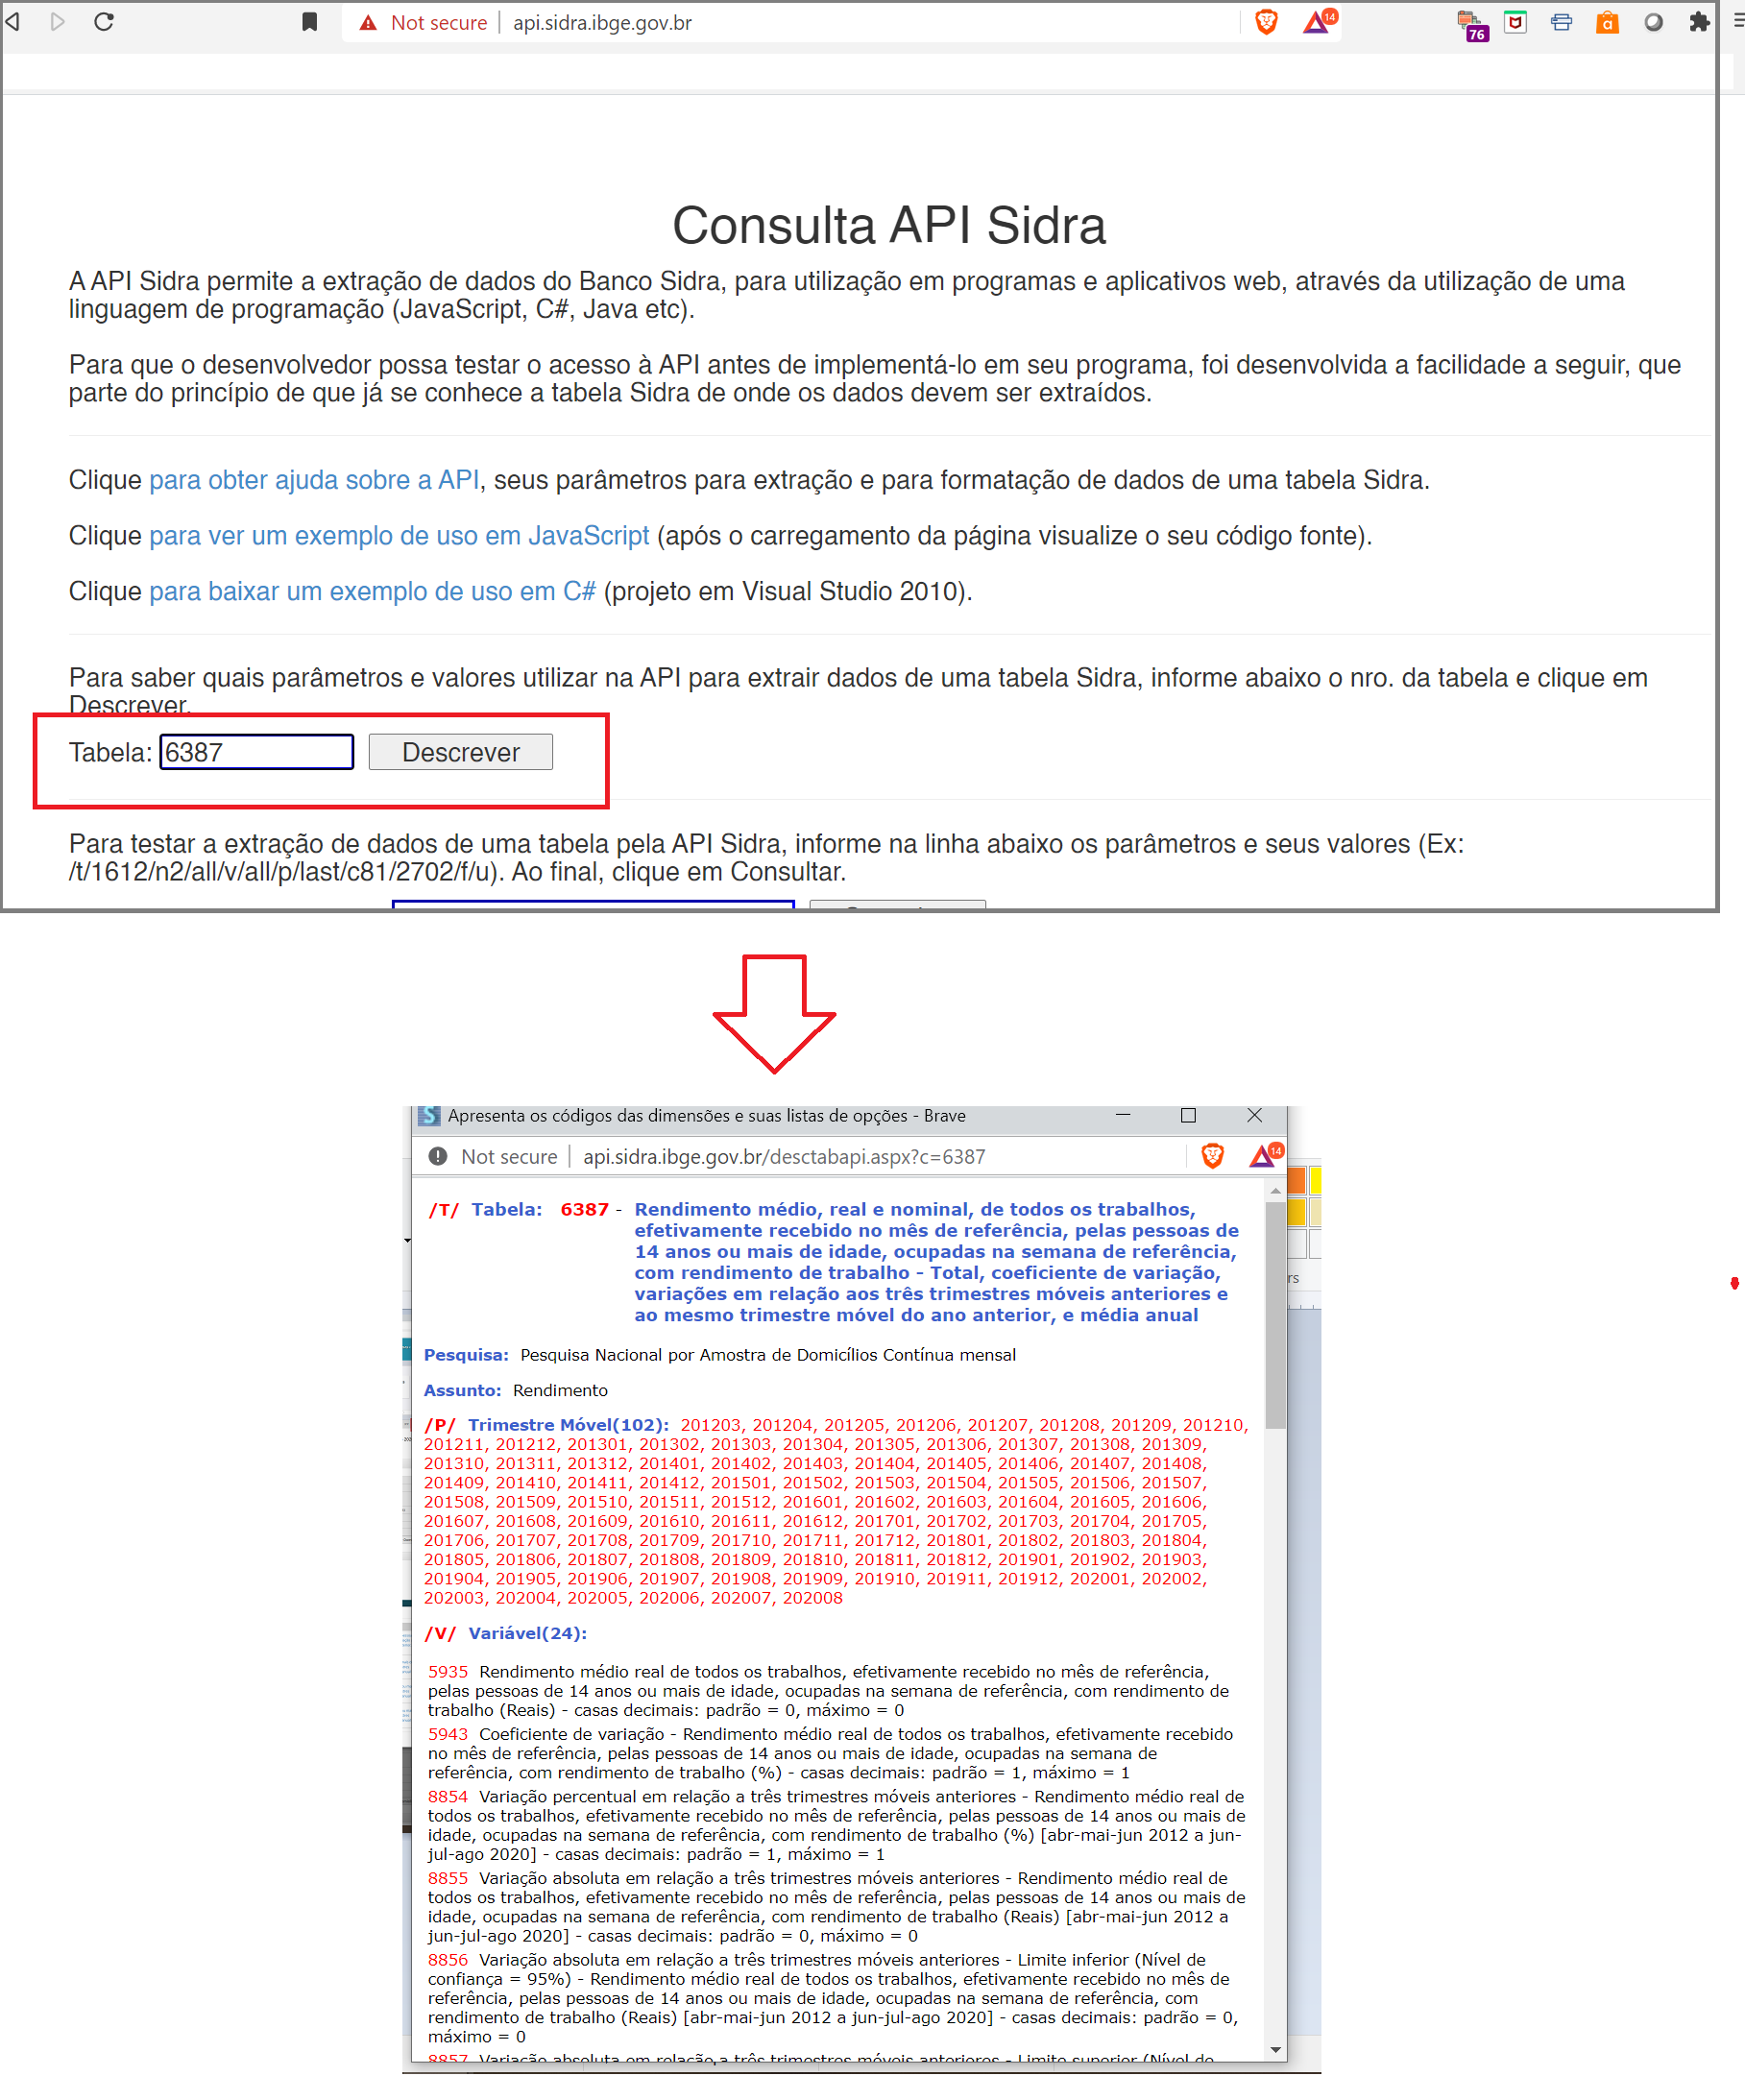


#### 3) Let's now test a way to gather the information. We are going to use the Sidra API test page. 

We enter some parameters granularity to test wich would be the information returned:



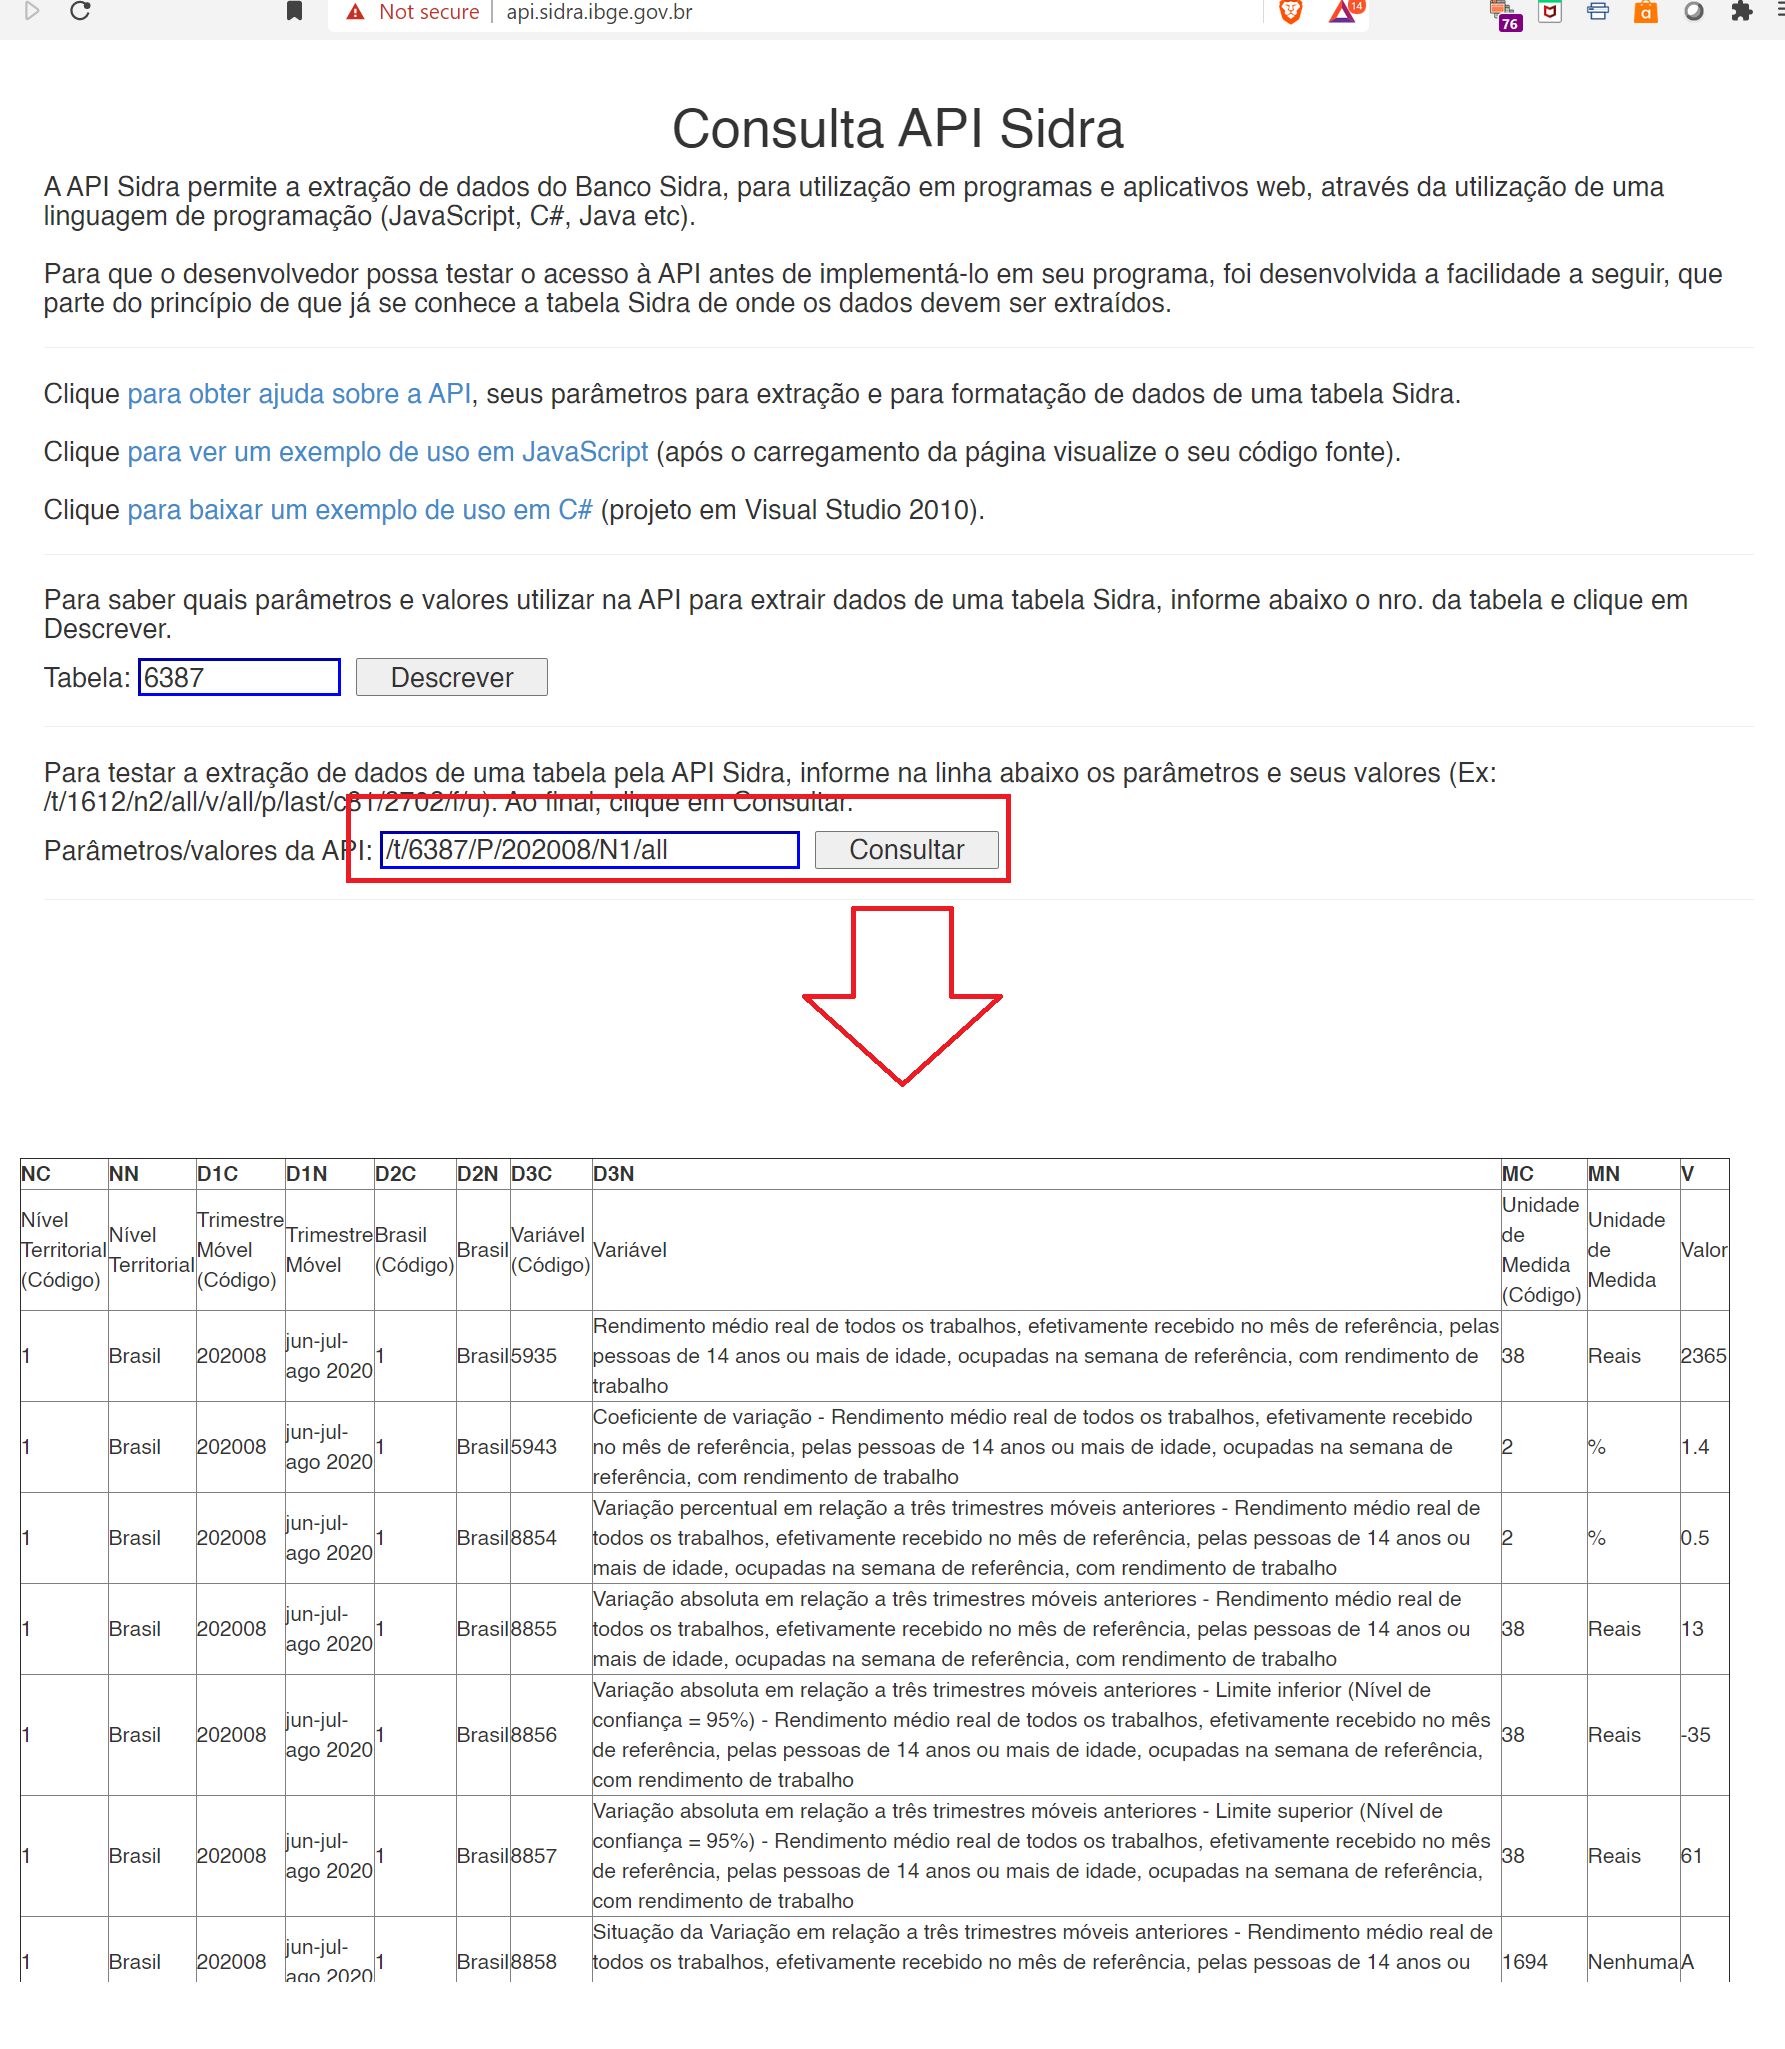






#### 4)  There is too many information in this tabel.. We will extract only variable 5935   
5935: Rendimento médio real de todos os trabalhos, efetivamente recebido no mês de referência, pelas pessoas de 14 anos ou mais de idade, ocupadas na semana de referência, com rendimento de trabalho:

This is the result we should get through the API: 

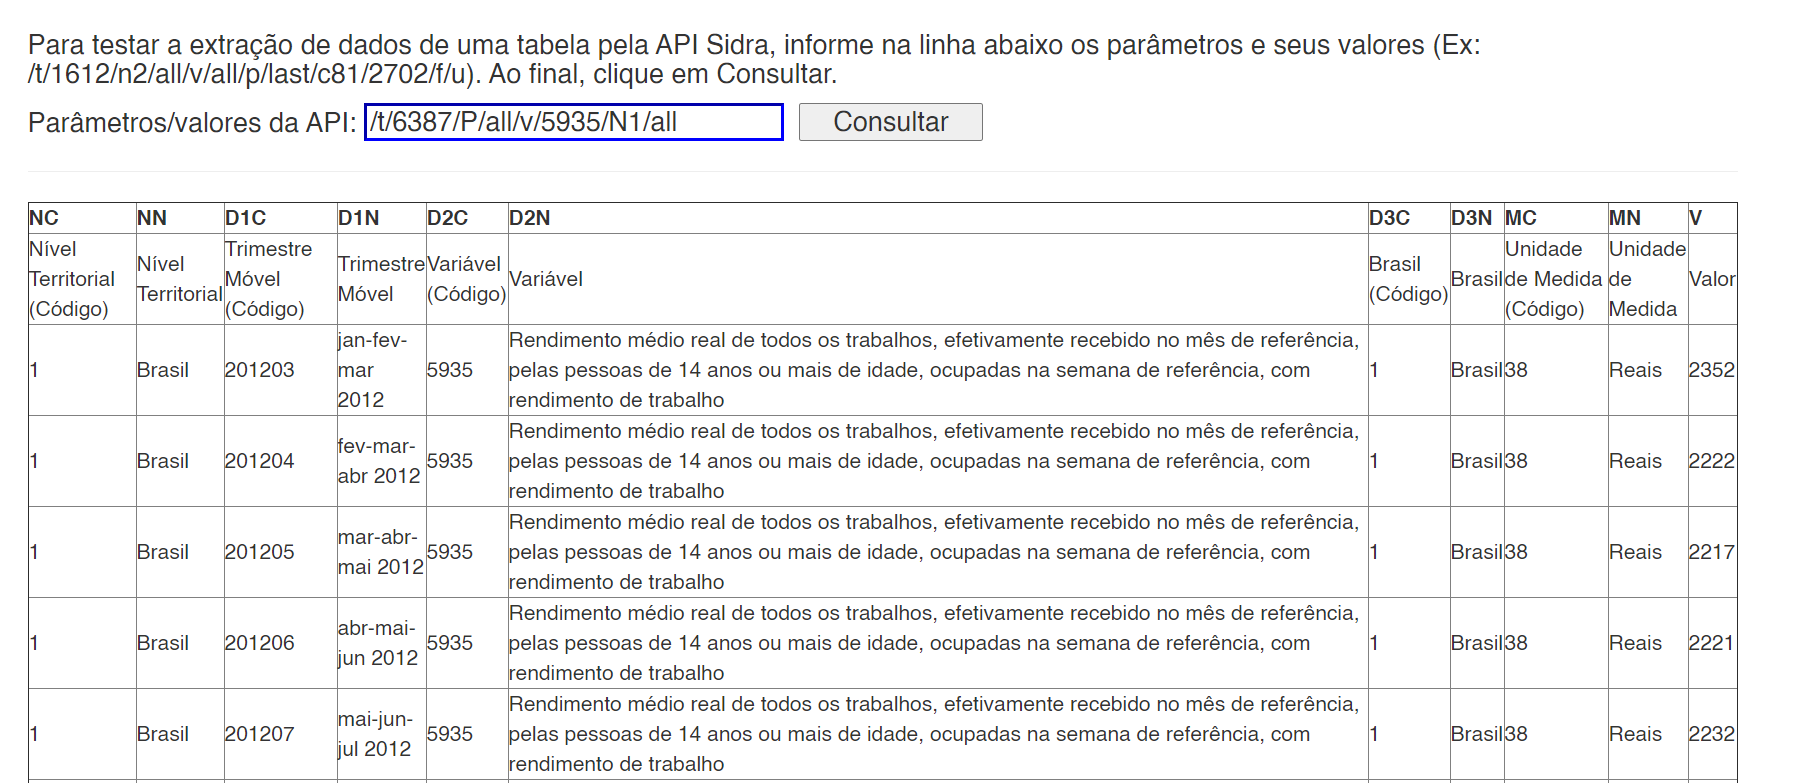








#### 5) Next step we will use these last parameters and extract this same informaton by using PyIBGE library with Python



In [11]:
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    print("seaborn not found, your plots won't look as good")

import pyibge

# Table ID: 6387 
# p/all: all the data available
# v/5935: people 14 or older, in thousands
# c604/40286: unemployed or in potential workforce (looking for job) or underemployed (<30 hours)
# n6/4205407: city/Florianópolis

query = pyibge.IBGEQuery(table_ID=6387, params='P/all/v/5935/N1/all')
query.get_data()


#We generate lists to contain:
# "trimesters": list will receive " D1C" column(see figure in step 4),  which contains the trimesters correspondant to the values
#  "values": list will receive "V" column , ehich is the values of there variable selected.

trimesters = [pyibge.period_to_date(x) for x in query.variables['D1C'].value]
values = [int(x) for x in query.variables['V'].value]

print("Trimesters is ", trimesters)
print("Values is ", values)

Trimesters is  ['03/2012', '04/2012', '05/2012', '06/2012', '07/2012', '08/2012', '09/2012', '10/2012', '11/2012', '12/2012', '01/2013', '02/2013', '03/2013', '04/2013', '05/2013', '06/2013', '07/2013', '08/2013', '09/2013', '10/2013', '11/2013', '12/2013', '01/2014', '02/2014', '03/2014', '04/2014', '05/2014', '06/2014', '07/2014', '08/2014', '09/2014', '10/2014', '11/2014', '12/2014', '01/2015', '02/2015', '03/2015', '04/2015', '05/2015', '06/2015', '07/2015', '08/2015', '09/2015', '10/2015', '11/2015', '12/2015', '01/2016', '02/2016', '03/2016', '04/2016', '05/2016', '06/2016', '07/2016', '08/2016', '09/2016', '10/2016', '11/2016', '12/2016', '01/2017', '02/2017', '03/2017', '04/2017', '05/2017', '06/2017', '07/2017', '08/2017', '09/2017', '10/2017', '11/2017', '12/2017', '01/2018', '02/2018', '03/2018', '04/2018', '05/2018', '06/2018', '07/2018', '08/2018', '09/2018', '10/2018', '11/2018', '12/2018', '01/2019', '02/2019', '03/2019', '04/2019', '05/2019', '06/2019', '07/2019', '08/2

In [12]:
type(trimesters)

list

In [13]:
"""
==========================================================================================
EXAMPLE 2

Quantity of Eggs produced in Brasil per state
============================================================================================
"""



import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    print("seaborn not found, your plots won't look as good")

import pyibge

# Table 915: number of informers, number of chickens and eggs produced
# p/201802: 2nd trimester of 2018
# v/29: number of eggs produced (thousand dozens)
# c12716/115236: trimester total
# n3/all: all states of Brazil

query = pyibge.IBGEQuery(table_ID=915, params='p/201802/v/29/c12716/115236/n3/all')
query.get_data()

values = []

for (state, value) in zip(query.variables['D4N'].value, query.variables['V'].value):
    try:
        values.append((state, int(value)))
    except:
        print("State of ", state, " has X in the value column. This means some data is censored.")

values.sort(key=lambda value: value[1])
print(values)

pos = range(len(values))

labels, amounts = zip(*values)


State of  Tocantins  has X in the value column. This means some data is censored.
State of  Maranhão  has X in the value column. This means some data is censored.
[('Acre', 1213), ('Roraima', 1359), ('Rondônia', 1646), ('Rio de Janeiro', 2779), ('Distrito Federal', 4041), ('Piauí', 4090), ('Sergipe', 4403), ('Alagoas', 5559), ('Pará', 6579), ('Paraíba', 7314), ('Rio Grande do Norte', 8913), ('Amazonas', 9927), ('Bahia', 11091), ('Mato Grosso do Sul', 11472), ('Santa Catarina', 40986), ('Ceará', 41307), ('Pernambuco', 47464), ('Mato Grosso', 47827), ('Goiás', 50077), ('Rio Grande do Sul', 65731), ('Paraná', 78213), ('Minas Gerais', 80947), ('Espírito Santo', 83231), ('São Paulo', 254785)]


In [14]:
labels

('Acre',
 'Roraima',
 'Rondônia',
 'Rio de Janeiro',
 'Distrito Federal',
 'Piauí',
 'Sergipe',
 'Alagoas',
 'Pará',
 'Paraíba',
 'Rio Grande do Norte',
 'Amazonas',
 'Bahia',
 'Mato Grosso do Sul',
 'Santa Catarina',
 'Ceará',
 'Pernambuco',
 'Mato Grosso',
 'Goiás',
 'Rio Grande do Sul',
 'Paraná',
 'Minas Gerais',
 'Espírito Santo',
 'São Paulo')

In [17]:
values

[('Acre', 1213),
 ('Roraima', 1359),
 ('Rondônia', 1646),
 ('Rio de Janeiro', 2779),
 ('Distrito Federal', 4041),
 ('Piauí', 4090),
 ('Sergipe', 4403),
 ('Alagoas', 5559),
 ('Pará', 6579),
 ('Paraíba', 7314),
 ('Rio Grande do Norte', 8913),
 ('Amazonas', 9927),
 ('Bahia', 11091),
 ('Mato Grosso do Sul', 11472),
 ('Santa Catarina', 40986),
 ('Ceará', 41307),
 ('Pernambuco', 47464),
 ('Mato Grosso', 47827),
 ('Goiás', 50077),
 ('Rio Grande do Sul', 65731),
 ('Paraná', 78213),
 ('Minas Gerais', 80947),
 ('Espírito Santo', 83231),
 ('São Paulo', 254785)]

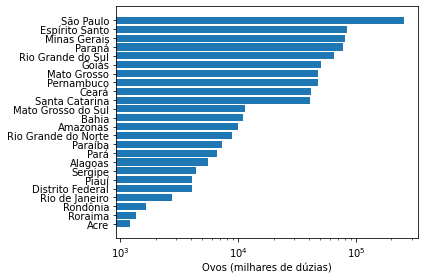

In [15]:
plt.barh(pos, amounts, align='center', log=True)
plt.yticks(pos, labels)
plt.xlabel('Ovos (milhares de dúzias)')
plt.tight_layout()
plt.show()

In [ ]:
"""
==========================================================================================
EXAMPLE 3

Unemployment rate
============================================================================================
"""

#!/usr/bin/env python3

# Example to get data from the PNAD (Pesquisa Nacional por Amostra de Domicílios) and
# plot the unemployment/underemployment levels.

import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    print("seaborn not found, your plots won't look as good")

import pyibge

# Table ID: 4100 (Unemploment/underemployment)
# p/all: all the data available
# v/1641: people 14 or older, in thousands
# c604/40286: unemployed or in potential workforce (looking for job) or underemployed (<30 hours)
# n6/4205407: city/Florianópolis

query = pyibge.IBGEQuery(table_ID=4100, params='p/all/v/1641/c604/40286/n6/4205407')
query.get_data()

trimesters = [pyibge.period_to_date(x) for x in query.variables['D1C'].value]
values = [int(x) for x in query.variables['V'].value]



print("Trimesters is ", trimesters)
print("Values is ", values)


ticks = list(range(len(values))) # XXX: ugly hack
plt.ylim([min(values)-2, max(values)+2])

plt.plot(ticks, values, 'g-o')
plt.xticks(ticks, trimesters, fontsize=8, rotation=45)

plt.title('Subutilização da força de trabalho: Florianópolis', fontsize=16)
plt.xlabel("Trimestre")
plt.ylabel("População desocupada (milhares)")

try:
    sns.despine()
except(NameError):
    pass

plt.tight_layout()
plt.show()